## Projeto de Análise de Dados com Linguagem Python

### Projeto 8 - Técnicas de Visualização de Dados

#### # Pacotes Python usados no projeto

In [1]:
# Pacotes Python usados no projeto
# ! pip install -q -U watermark

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark -a "Leonardo da Silva Neves"

Author: Leonardo da Silva Neves



**Este projeto terá como base o dataset tratado no projeto 7.**

In [4]:
# Carregando os dodos
file = pd.read_csv("Cap12/resultado_projeto7.csv")

In [5]:
# Visualizando as primeiras linhas
file.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,0,9,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,2,0,1,6,0,1,0,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,0,7,1,1,0,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,0,5,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,9,0,1,1,3,0,1


In [6]:
# Shape
file.shape

(68629, 22)

In [7]:
# Info
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient      

#### Perguntas de Negócio
**Tem que criar os gráficos de acordo com os objetivos listados abaixo!**


**1 - Total de Medicamentos Utilizados por Faixa Etária**

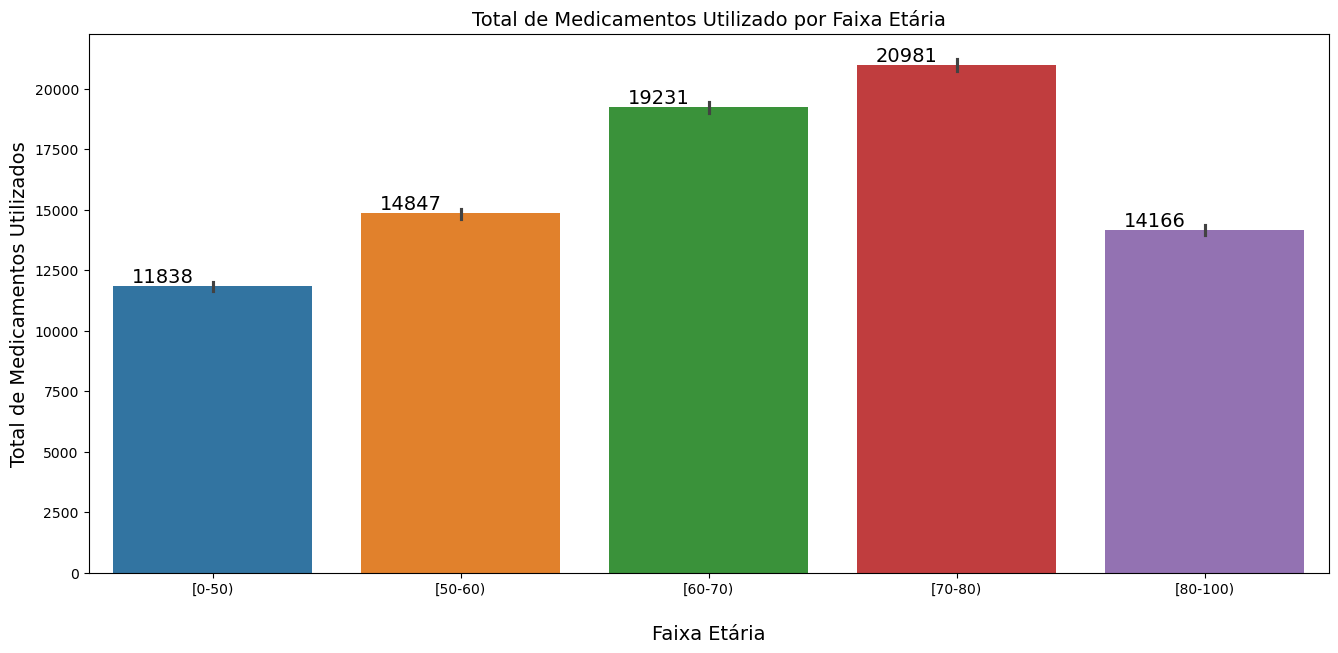

In [8]:
# Tamanho da Figura
plt.figure(figsize = (16,7))

# Criação do gráfico de barras
figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = file, hue='age')

# Label do eixo x
plt.xlabel("\nFaixa Etária", fontsize=14, color='black')

# label do eixo y
plt.ylabel("Total de Medicamentos Utilizados", fontsize=14, color='black')

# Título
plt.title("Total de Medicamentos Utilizado por Faixa Etária", fontsize=14, color='black')

# Coloca os totais em cada uma das barras com labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize=14,
                  color='black')
# Mostrar o gráfico
plt.show()

**2 - Total de Readmissões de Pacientes Diabéticos  Por Gênero**

In [9]:
file['gender'].value_counts()

gender
0    36582
1    32047
Name: count, dtype: int64

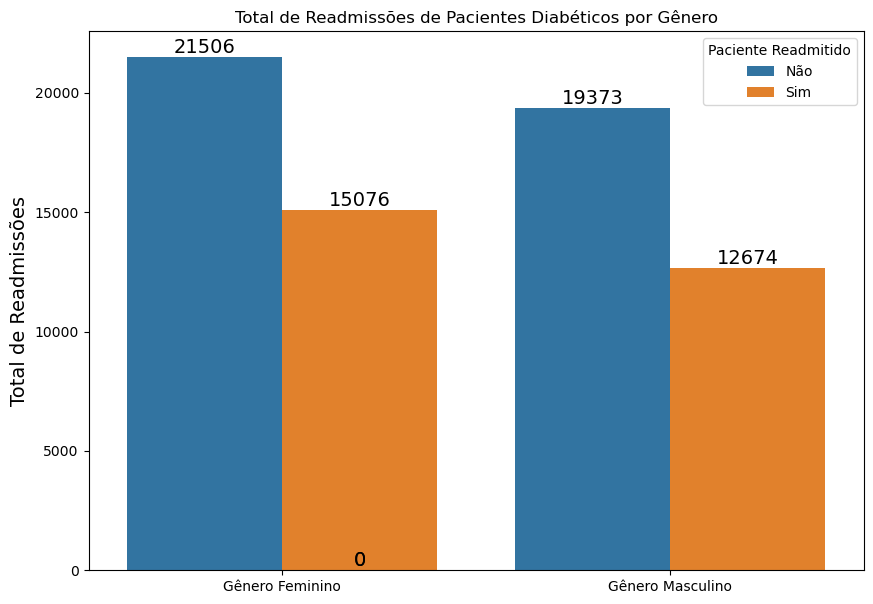

In [10]:
# Count Plot (Gráfico de Barras Para Variáveis Categóricas)

# Criando o gráfico de barras com label encoding
figx = sns.countplot(x = [('Gênero Feminino' if x == 0 else 'Gênero Masculino') for x in file['gender']],
                    hue = 'readmitted',
                    data = file)

# Tamanho da figura em polegadas
figx.figure.set_size_inches(10,7)

# Legenda
figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color='black')

# Título
figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos por Gênero')

# Coloca os totais em cada uma das barras com labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize = 14,
                  color = 'black')

# Mostrar Gráfico
plt.show()

**3 - Total de Readmissões de Pacientes por Faixa Etária**

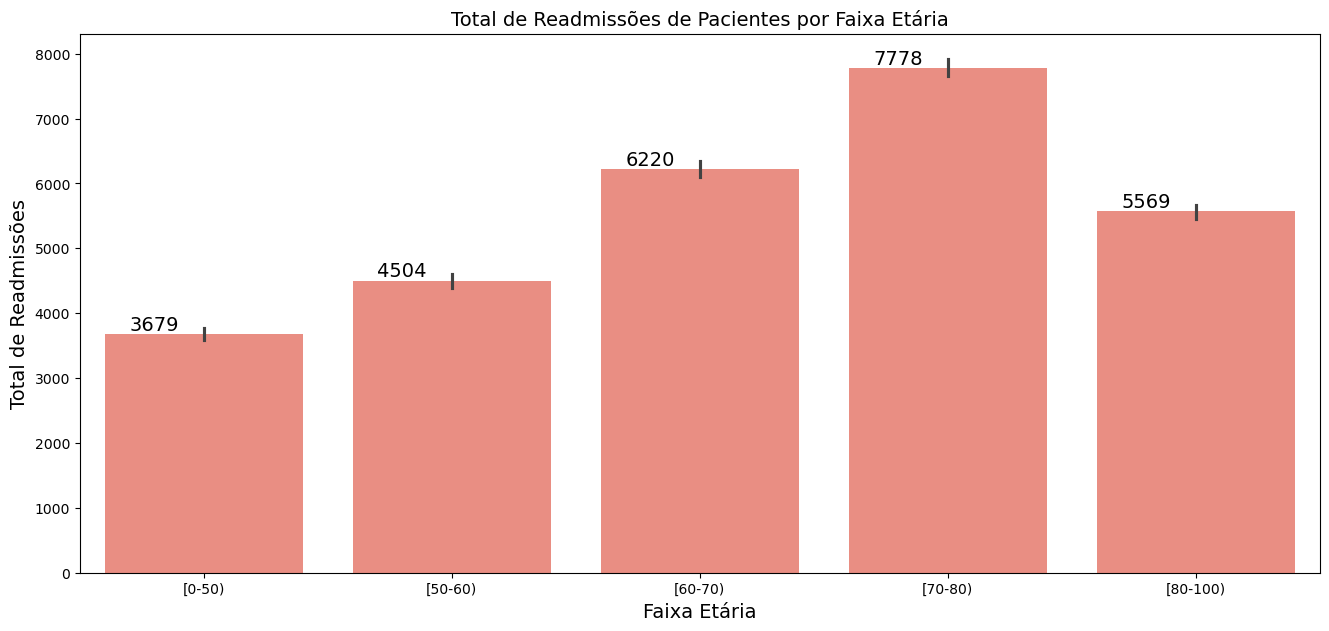

In [11]:
# Gráfico de barras de uma única cor

# Tamanho da figura
plt.figure(figsize=(16,7))

# Criação do gráfico de barras
figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data=file, color='salmon')

# Label do eixo x
plt.xlabel('Faixa Etária', fontsize = 14, color='black')

# Label do eixo y
plt.ylabel('Total de Readmissões', fontsize=14, color='black')

# Título
plt.title('Total de Readmissões de Pacientes por Faixa Etária', fontsize=14, color = 'black')

# Colocar o total em cada barra como label
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize=14,
                  color='black')

plt.show()

**4 - Percentual de Readmissões/Não Readmissões de Pacientes por Faixa Etária**

In [12]:
# Calculo do percentual das idades pois está informação não está no conjunto de dados
perc_age_readmitted = pd.crosstab(file.age, file.readmitted, margins = True, normalize = 'index')*100
perc_age_readmitted

readmitted,0,1
age,,
[0-50),64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


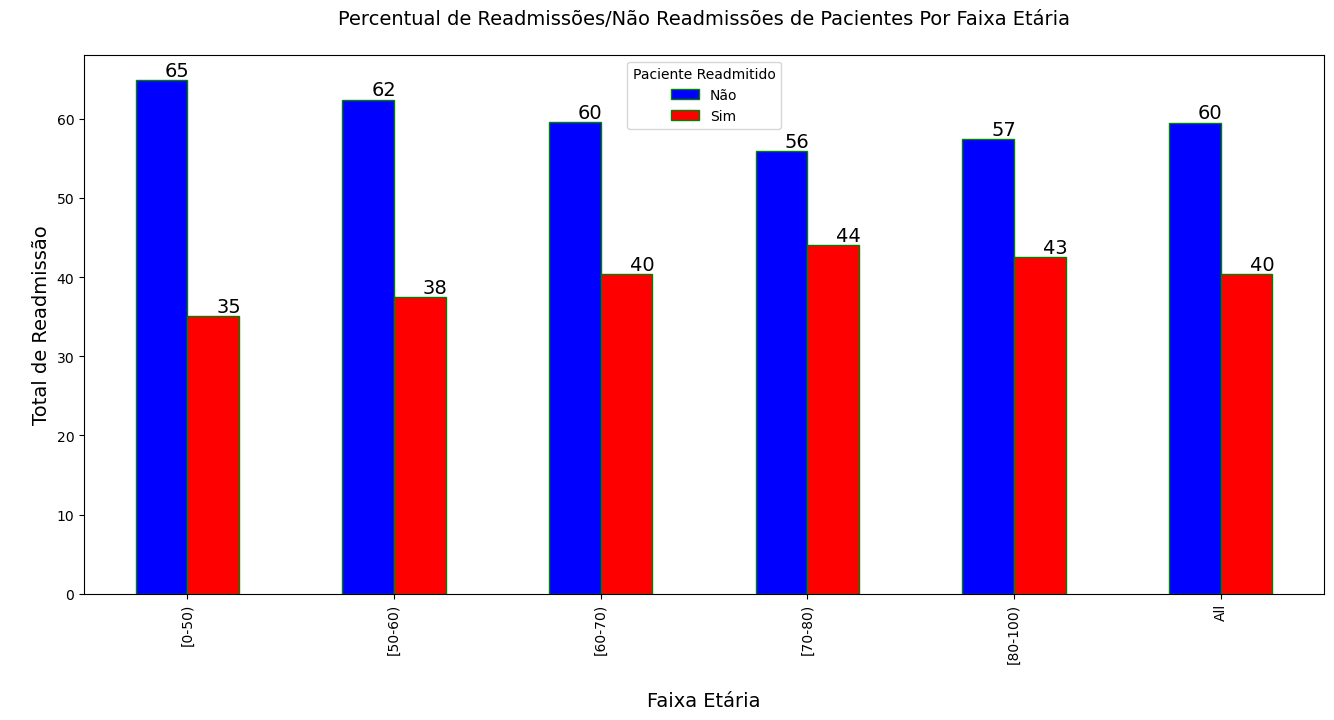

In [13]:
# Gráfico de Barras do Pandas

# Observe que chamamos o plot a partir do dataframe usando nesse caso o Matplotlib
fig = perc_age_readmitted.plot(kind = 'bar',
                              figsize = (16, 7),
                              width = 0.5,
                              edgecolor = 'g',
                              color = ['b', 'r'])

# Legenda
plt.legend(title = 'Paciente Readmitido', labels=('Não', 'Sim'))

# Label do eixo x
plt.xlabel("\nFaixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("\nTotal de Readmissão", fontsize=14, color = 'black')

# Título
plt.title("Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária\n", fontsize=14)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.2, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')

plt.show()

**5 - Total de Readmissões de Pacientes por Gênero, Por idade e Por Tipo de Admissão**

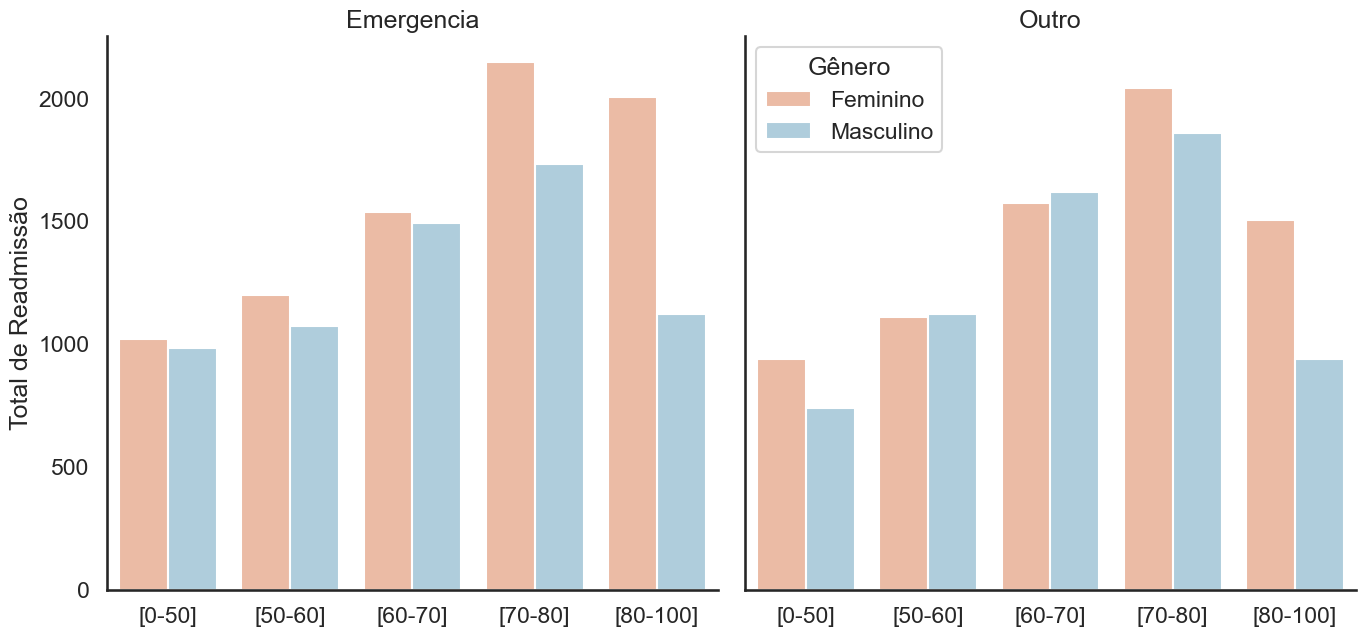

In [14]:
# Catplot (Plot de Categorias com Gráfico de Barras)

# Vamos incluir o background
sns.set(style = "white", context = "talk")

# Criação do gráfico de barras com catplot
g = sns.catplot(x = 'age',
                y = 'readmitted',
                hue = 'gender',
                col = 'admission_type_id',
                estimator = np.sum,
                data = file,
                palette = "RdBu",
                kind = "bar",
                height = 7,
                aspect = 1,
                legend = False,
                ci = None)

# labels
(g.set_axis_labels("", "Total de Readmissão")
 .set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
 .set_titles("{col_name}"))

# Legenda
plt.legend(title= 'Gênero', loc= 'upper left', labels = ['Feminino', 'Masculino'])

plt.show()

**6 - Total de Readmissões/Não Readmissões por Gênero e por Raça**

In [15]:
# Criar um dataframe temporário para ajustar o label de variáveis  para o plot
df_temp = file

In [16]:
# Faz o mapeamento de 0 e 1 para  labels
df_temp['readmitted'] = df_temp['readmitted'].map({0:"Não Readmitido", 1: "Readmitido"})

In [17]:
df_temp.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,0,9,1,1,Readmitido,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,2,0,1,6,0,1,Não Readmitido,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,0,7,1,1,Não Readmitido,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,0,5,1,1,Não Readmitido,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,9,0,1,Readmitido,3,0,1


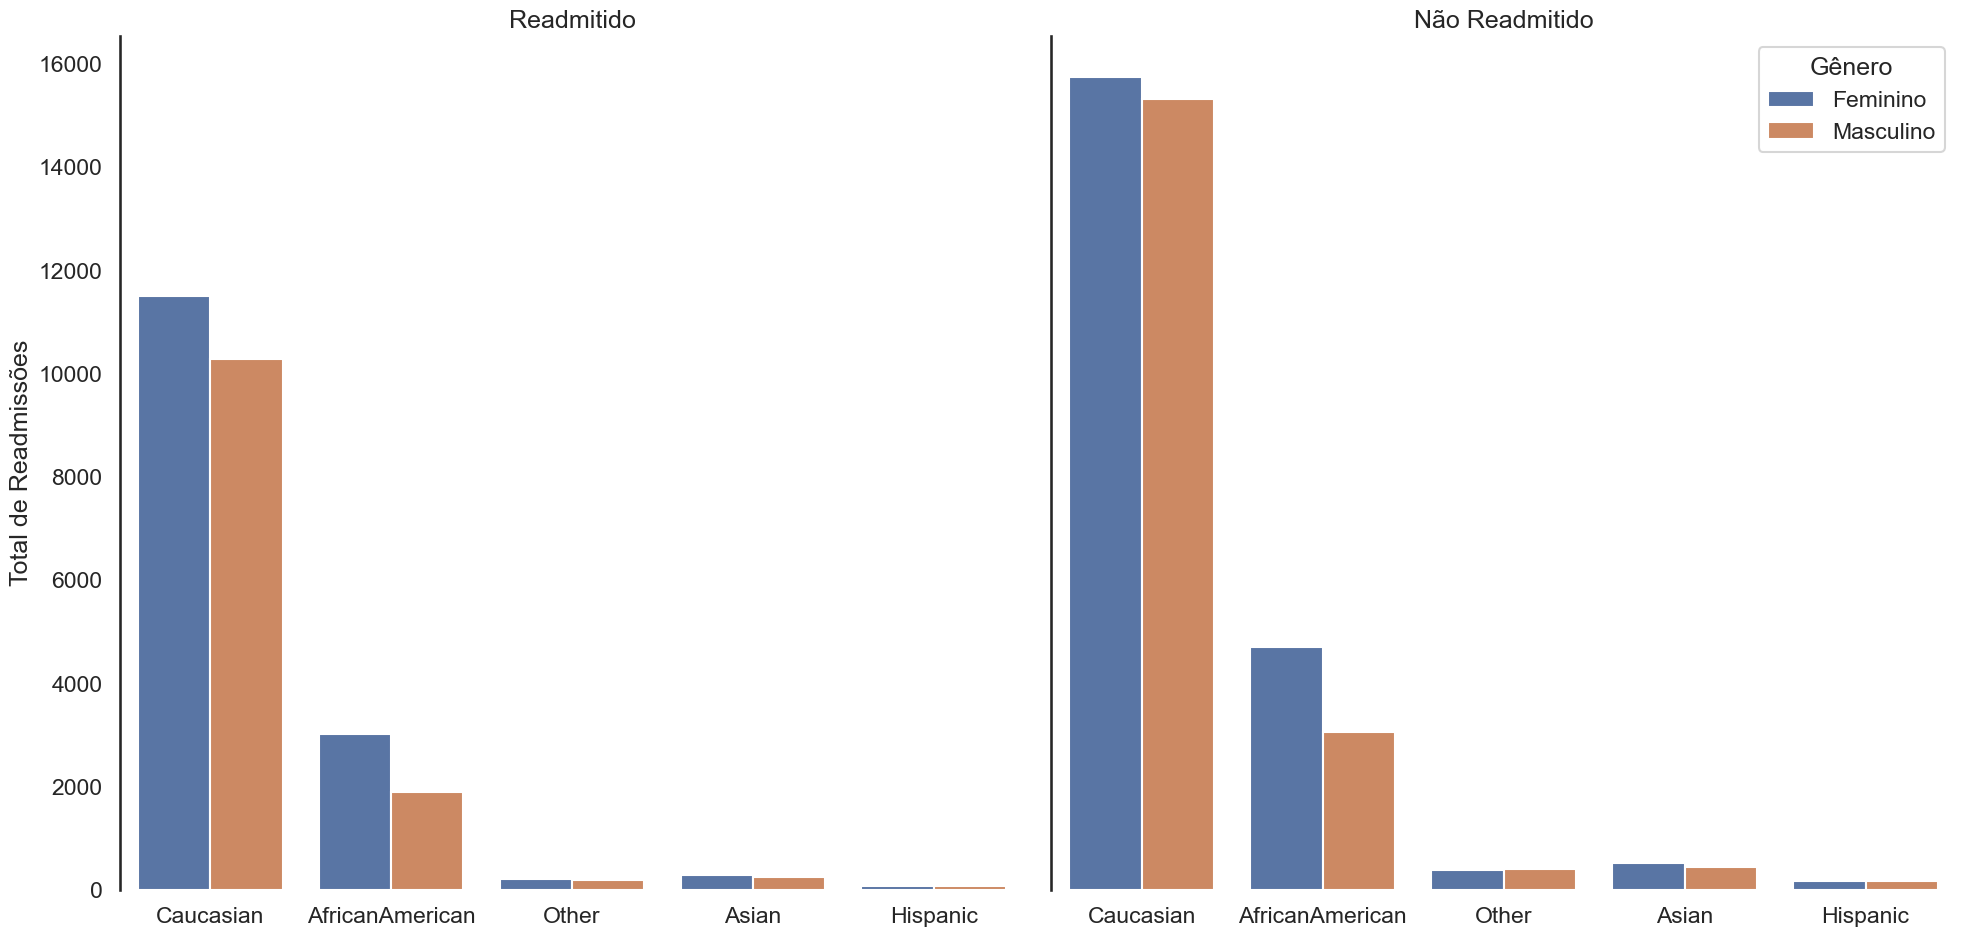

In [18]:
# Facet Grid

# Remove o background
sns.set(style = "white", context = "talk")

# Cria uma funcão para o countplot
def countplot(x, hue, **kwargs):
    sns.countplot(x = x, hue = hue, **kwargs)

# Cria um facegrid (usando o dataframe temporário)
grid = sns.FacetGrid(data = df_temp, col = 'readmitted', height = 10, aspect = 1)

# Mapeamento do facetgrid ás variáveis
fig = grid.map(countplot, 'race', 'gender', palette = 'deep')

# labels
(fig.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["Caucasian", "AfricanAmerican", "Other", "Asian", "Hispanic"])
 .set_titles('{col_name}'))

#Legenda
plt.legend(title = 'Gênero', loc = 'upper right', labels = ['Feminino', 'Masculino'])

# Remove os contornos do gráfico
sns.despine(bottom = True)

**7 - Número de Visitas x Comorbidades**

In [24]:
# Criando a tabela de contingência pd.crosstab(index, columns, ...)
n_visit_comorbidity = pd.crosstab(index = file.number_inpatient, columns = file.comorbidade).sum()
n_visit_comorbidity

comorbidade
0    15295
1    12868
2    27264
3    13202
dtype: int64

In [25]:
# Tipo
type(n_visit_comorbidity)

pandas.core.series.Series

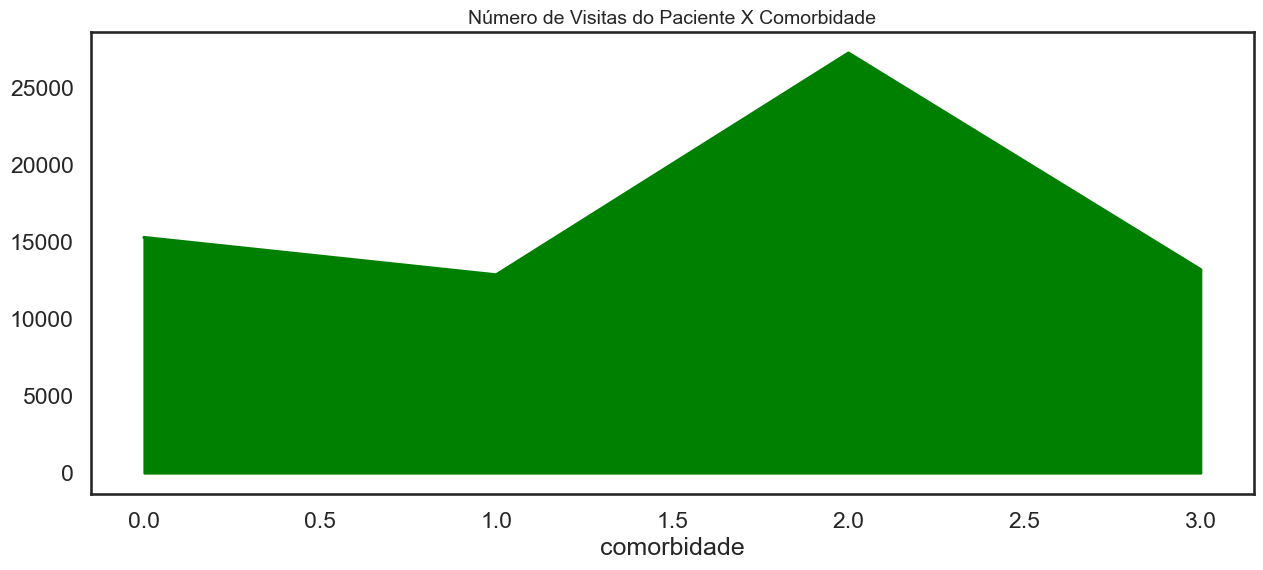

In [30]:
# Gráfico de área (Evitar!!!)

fig = n_visit_comorbidity.plot(kind = 'area',
                               figsize = (15,6),
                               color = 'Green',)

# Coloco o total em cada um das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x() + 0.2, p.get_height()),
                ha = 'center',
                va = 'bottom',
                fontsize = 14,
                color = 'black')

# Titulo
plt.title("Número de Visitas do Paciente X Comorbidade", fontsize= 14)
plt.show()

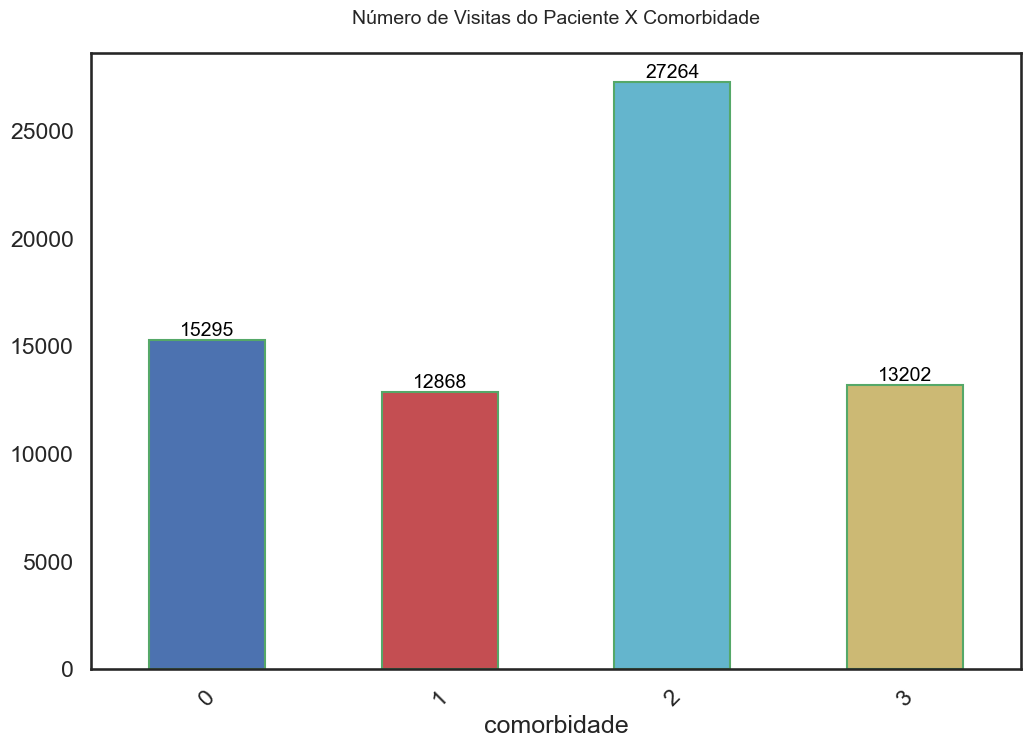

In [40]:
# Gráfico de Barras (Sempre a opção mais segura)

# Removendo as linhas do background
sns.set(style = "white", context = "talk")

# Criando o gráfico
fig = n_visit_comorbidity.plot(kind = 'bar',
                                   figsize = (12, 8),
                                   width = 0.5,
                                   edgecolor = 'g',
                                   color = ['b', 'r', 'c', 'y'],
                                   rot = 45)

for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.25, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')

plt.title("Número de Visitas do Paciente X Comorbidade\n", fontsize = 14)
plt.show()

**8 - Proporção de Readmissões pelo Número de Visitas Antes da Alta**

In [44]:
# Tabela de Contingência
percent_visit_readm = pd.crosstab(index = file.number_inpatient, columns = file.readmitted, normalize = 'index') * 100
percent_visit_readm

readmitted,Não Readmitido,Readmitido
number_inpatient,,
0,62.088788,37.911212
1,45.879397,54.120603
2,34.692557,65.307443
3,29.363450,70.636550
4,24.137931,75.862069
5,20.388350,79.611650
6,12.500000,87.500000
7,10.000000,90.000000
8,16.666667,83.333333


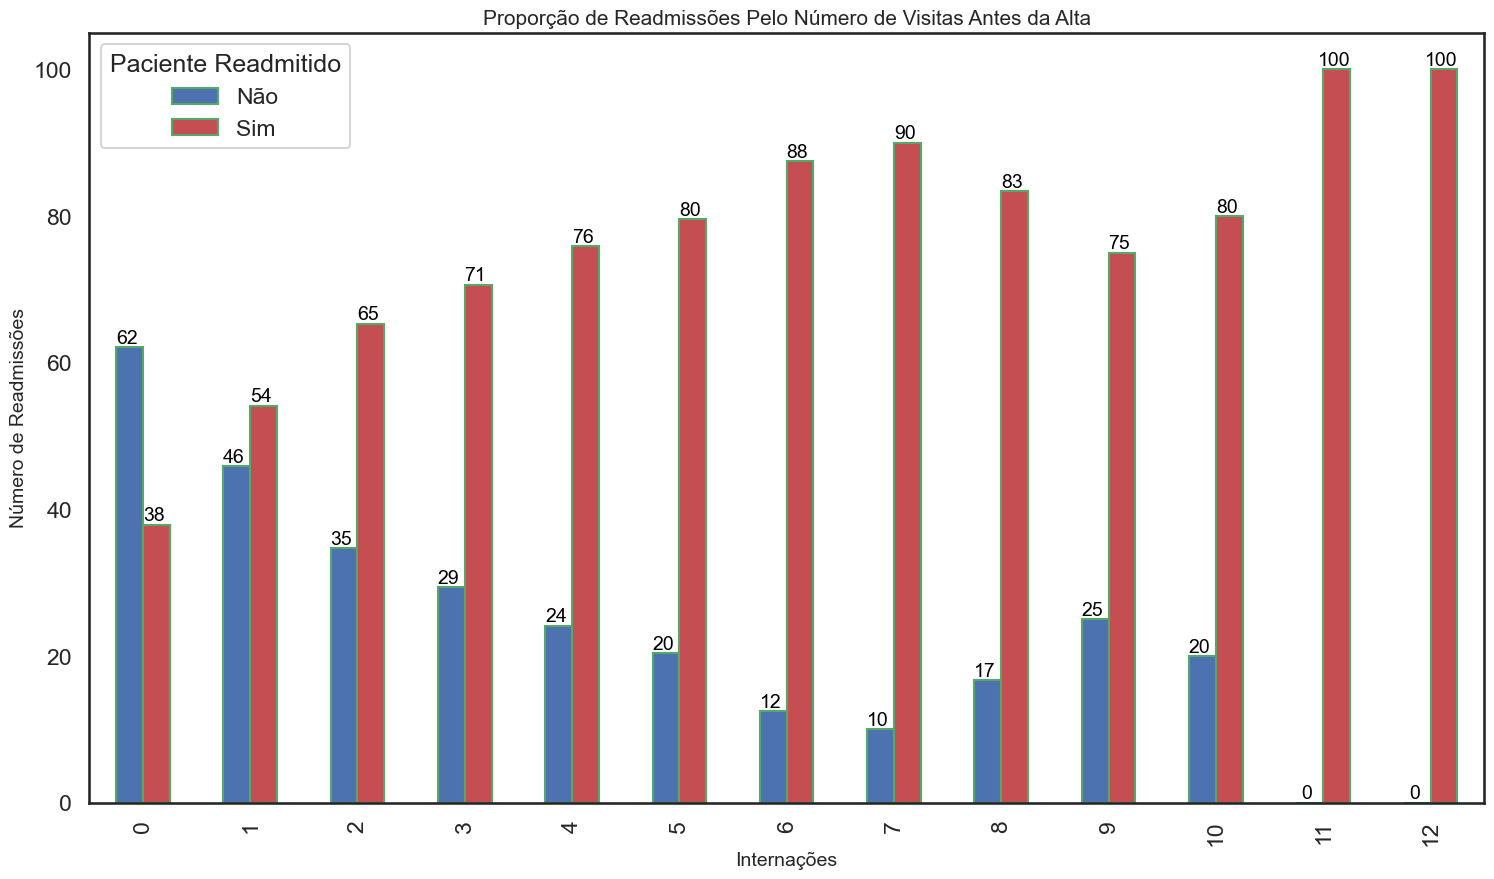

In [55]:
# Gráfico de Barras do Pandas a Partir da Tabela de Contigência

ax = fig = percent_visit_readm.plot(kind = 'bar',
                               figsize = (18, 10),
                               width = 0.5,
                               edgecolor = 'g',
                               color = ['b', 'r'])

ax.set_xlabel("Internações", fontsize=14)
ax.set_ylabel("Número de Readmissões", fontsize = 14)

# Colocar os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.1, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')

# Title
plt.title("Proporção de Readmissões Pelo Número de Visitas Antes da Alta", fontsize= 15)

fig.legend(title = "Paciente Readmitido", labels = ('Não', 'Sim'))

plt.show()

**9 - Qual a Frequência de Medicamento Utilizados**

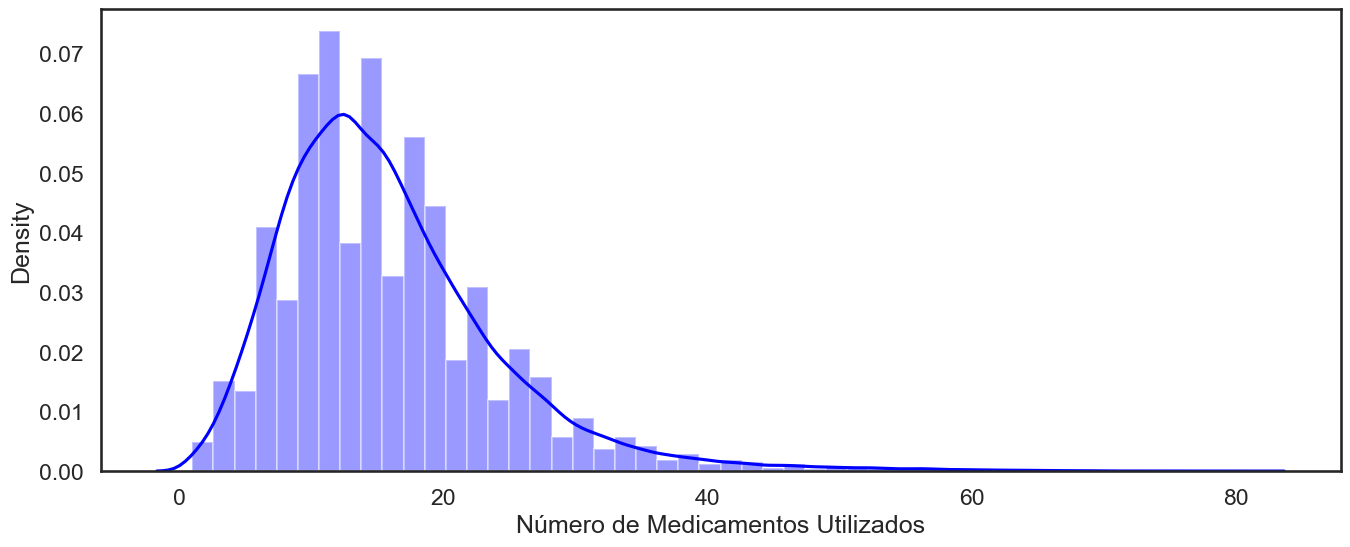

In [56]:
# Histograma (Dist plot)

# Tamanho da figura
plt.figure(figsize= (16,6))

# Criando o gráfico
sns.distplot(file.num_medications,
             hist = True,
             color = 'Blue',
             axlabel = "Número de Medicamentos Utilizados");

**Stacked Histogramas**

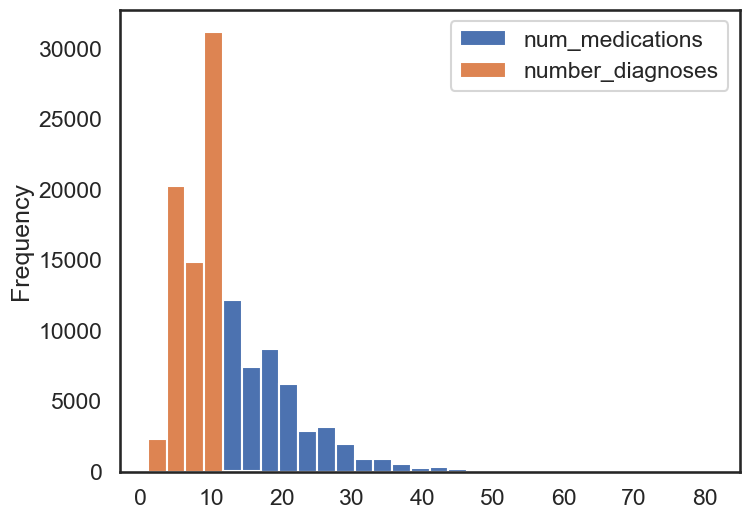

In [57]:
# Doois histogramas para suas variáveis diferentes (evite!!!)
file[["num_medications", "number_diagnoses"]].plot(bins=30, kind='hist', figsize=(8,6));

**Histograma da Mesma Variável por Diferentes Classes**

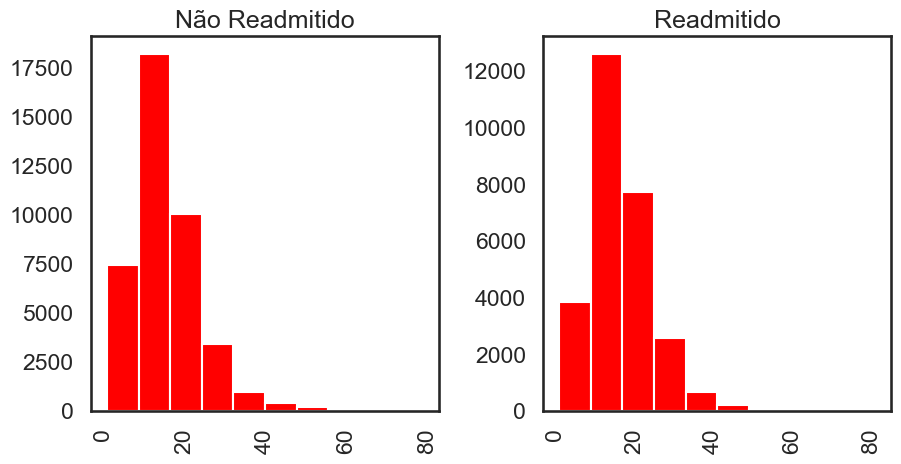

In [62]:
file["num_medications"].hist(by = file.readmitted, figsize = (10, 5), color = 'Red');

**10 - Comportamento do Paciente por Procedimentos Clinicos**

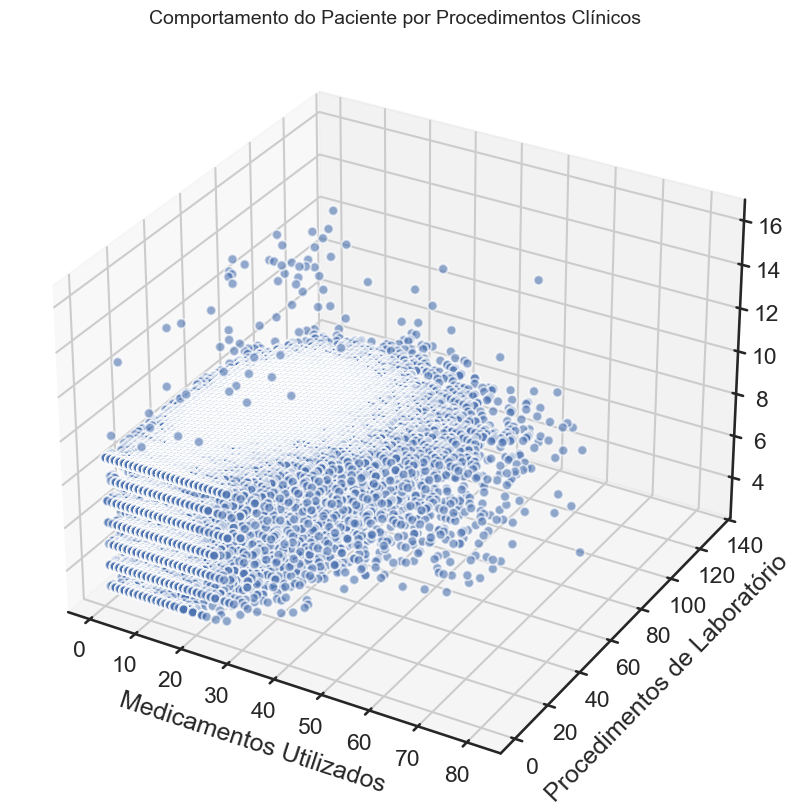

In [63]:
# Projeção 3D (Melhor evitar!!!)

fig = plt.figure(figsize = (14, 10))

# Subplot
ax = fig.add_subplot(111, projection = '3d')

# Dimensões
xs = file['num_medications']
ys = file['num_lab_procedures']
zs = file['number_diagnoses']

# Gráfico de pondos
ax.scatter(xs, ys, zs, s=50, alpha= 0.6, edgecolors = 'w')

# Label
ax.set_xlabel('\nMedicamentos Utilizados')
ax.set_ylabel('\nProcedimentos de Laboratório')
ax.set_zlabel('\nDiagnósticos')

plt.title("Comportamento do Paciente por Procedimentos Clínicos", fontsize = 14)

plt.show()

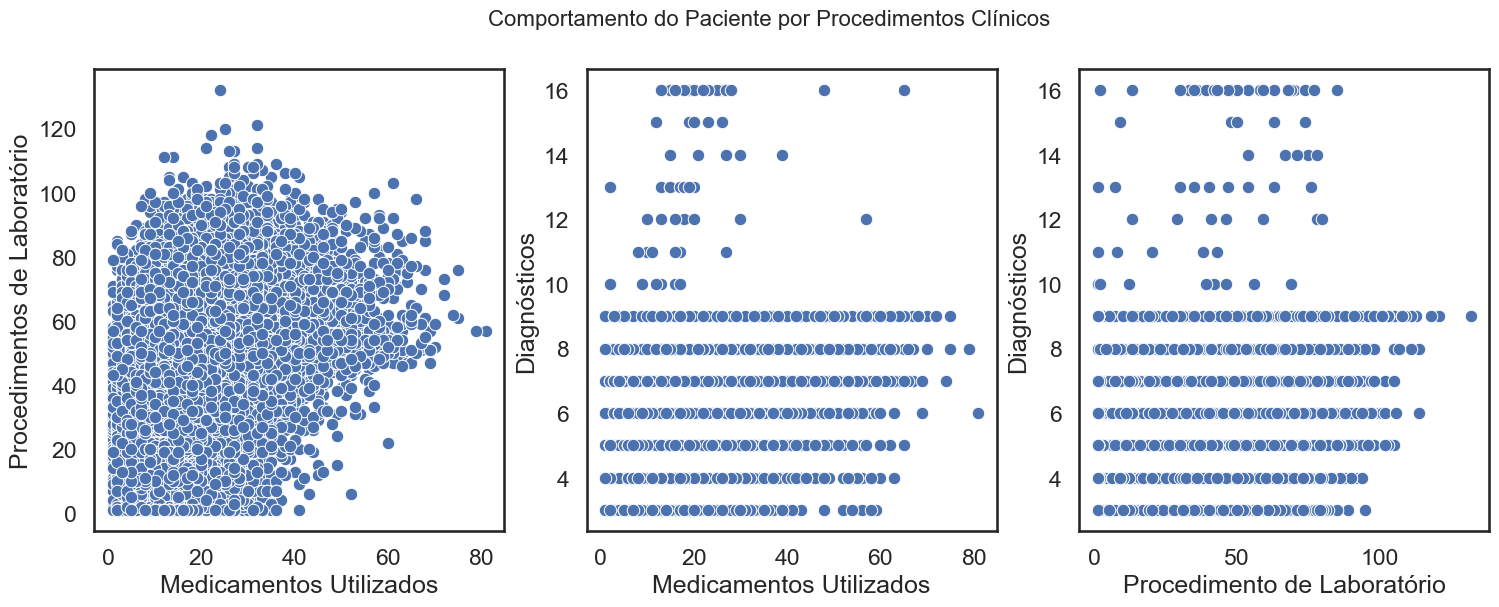

In [74]:
# Plot 2D (Esse é melhor para passar a informação

# Criando o gráfico 2D
fig, axs = plt.subplots(1, 3, figsize = (18, 6))

# Gráfico de Medicamentos Utilizados vs. Procedimentos de Laboratório
sns.scatterplot(x = file['num_medications'], y = file['num_lab_procedures'], data = file, ax = axs[0])
axs[0].set_xlabel('Medicamentos Utilizados')
axs[0].set_ylabel('Procedimentos de Laboratório')

# Gráfico de Medicamentos Utilizados vs. Diagnótico
sns.scatterplot(x = file['num_medications'], y = file['number_diagnoses'], data = file, ax = axs[1])
axs[1].set_xlabel('Medicamentos Utilizados')
axs[1].set_ylabel('Diagnósticos')

# Gráfico de Procedimentos de Laboratório vs. Diagnósticos
sns.scatterplot(x = file['num_lab_procedures'], y = file['number_diagnoses'], data = file, ax = axs[2])
axs[2].set_xlabel('Procedimento de Laboratório')
axs[2].set_ylabel('Diagnósticos')

# Title
plt.suptitle("Comportamento do Paciente por Procedimentos Clínicos", fontsize = 16)

plt.show()

In [75]:
%watermark -a "Leonardo da Silva Neves"

Author: Leonardo da Silva Neves



In [77]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.27.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [78]:
%watermark --iversions

matplotlib: 3.9.2
pandas    : 2.2.2
numpy     : 1.26.4
seaborn   : 0.13.2

